### Contexto

---

Exercício prático do Capítulo 4 trata de um problema em um processo produtivo referente ao acionamento de duas válvulas, $A$ e $B$, comandadas por um sistema comutador que toma a decisão com base em sinais $x_1$, $x_2$, $x_3$ e $x_4$. Os quais estão sofrendo com interferências e para solucionar a equipe de engenheira da empresa optou pela rede Adaline com quatro entradas e limiar de ativação $\theta = -1$, o qual representa a válvula $A$ e 1 representa a $B$. A arquitetura pode ser visualizada na Figura a seguir.

<img src="EPC4_Rede_Adaline.jpg" width="600">


### Bibliotecas utilizadas

---

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### Tratamento dos dados

---

In [12]:
# Leitura dos dados

data = pd.read_csv('data_46_RNA.txt', delim_whitespace=True)

In [13]:
data

,x1,x2,x3,x4,d
0,0.4329,-1.3719,0.7022,-0.8535,1.0
1,0.3024,0.2286,0.8630,2.7909,-1.0
2,0.1349,-0.6445,1.0530,0.5687,-1.0
3,0.3374,-1.7163,0.3670,-0.6283,-1.0
4,1.1434,-0.0485,0.6637,1.2606,1.0
5,1.3749,-0.5071,0.4464,1.3009,1.0
6,0.7221,-0.7587,0.7681,-0.5592,1.0
7,0.4403,-0.8072,0.5154,-0.3129,1.0
8,-0.5231,0.3548,0.2538,1.5776,-1.0
9,0.3255,-2.0000,0.7112,-1.1209,1.0


In [17]:
# Separacao dos dados

x1 = data['x1'].copy()
x2 = data['x2'].copy()
x3 = data['x3'].copy()
x4 = data['x4'].copy()
X = pd.concat([x1, x2, x3, x4], axis=1)

y = data['d'].copy()

In [18]:
# Normalizacao dos dados segundo escala minmax

def normalizacao(data):

    min = data.values.min()
    max = data.values.max()

    data_norm = data.copy()

    for j in data.columns:

        for i in data.index:

            x = data.loc[i, j]

            x_norm = x / max

            data_norm.loc[i, j] = x_norm

    return data_norm

In [19]:
X_norm = normalizacao(X)

In [21]:
# Adiciona coluna do limiar de ativacao = -1 (bias) no conjunto de dados
 
X_norm['bias'] = -1

In [22]:
X_norm = np.array(X_norm)


In [23]:
X_norm

array([[ 7.43367391e-02, -2.35579978e-01,  1.20580407e-01,
        -1.46561346e-01, -1.00000000e+00],
       [ 5.19275350e-02,  3.92547437e-02,  1.48192668e-01,
         4.79247875e-01, -1.00000000e+00],
       [ 2.31647635e-02, -1.10672276e-01,  1.80819095e-01,
         9.76560488e-02, -1.00000000e+00],
       [ 5.79376664e-02, -2.94719670e-01,  6.30205203e-02,
        -1.07890444e-01, -1.00000000e+00],
       [ 1.96342406e-01, -8.32832489e-03,  1.13969262e-01,
         2.16467760e-01, -1.00000000e+00],
       [ 2.36095132e-01, -8.70782176e-02,  7.66549326e-02,
         2.23387997e-01, -1.00000000e+00],
       [ 1.23997596e-01, -1.30282476e-01,  1.31896626e-01,
        -9.60247274e-02, -1.00000000e+00],
       [ 7.56074526e-02, -1.38610801e-01,  8.85034773e-02,
        -5.37305744e-02, -1.00000000e+00],
       [-8.98257062e-02,  6.09255602e-02,  4.35820383e-02,
         2.70902378e-01, -1.00000000e+00],
       [ 5.58942217e-02, -3.43436078e-01,  1.22125869e-01,
        -1.92478750e-01

### Treinamento da rede neural

---

In [120]:
# valor maximo de epocas
MAX_EPOCA = 10000

# Taxa de aprendizado
n = 0.0025

# Precisao
p = 1e-6

# Pesos iniciais (wi) e ajustados/finais (wf)
wi = pd.DataFrame(columns=['w0', 'w1', 'w2', 'w3', 'w4'])
wf = pd.DataFrame(columns=['w0', 'w1', 'w2', 'w3', 'w4'])

In [27]:
def func_ativacao(u):

    n = len(u)

    # Funcao Degrau Bipolar (-1;1)
    g = np.full(n, 1)

    # Verificacao: se u < 0, y = -1
    for i in range(n):

        if u[i] < 0:
            
            g[i] = -1

    return g

In [121]:
def treinamento(MAX_EPOCA, n, p, wi, wf, X_norm, y):

    y = np.array(y)

    # Vetor de erros
    
    erro = np.zeros(MAX_EPOCA)

    for n_treino in range(5):

        print('-'*30)
        print(f'Treinamento numero: {n_treino}')
        print('-'*30)
        
        # Pesos aleatorios entre 0 e 1 do n_treino
        w = np.random.rand(5, 1)
        
        print(f'Pesos iniciais aleatorios: \n {w}')

        # Salva na tabela wi
        wi.loc[n_treino, :] = w[:, 0]

        # Contador de epocas
        epoca = 0

        print('-'*30)
        while(epoca < MAX_EPOCA):

            # Multiplicacao dos dados de entrada e bias (X_norm) pelos pesos (w)
            u = X_norm.dot(w)

            # Matriz resultante da multiplicacao das entradas pelos pesos (xn*wn) em formato de vetor
            u = np.array(u)

            # Verificacao do sinal de saida pela funcao de ativacao
            y_calc = func_ativacao(u)

            # Erro da etapa anterior
            erro[epoca] = np.mean((y - u) ** 2)

            # Regra Delta
            e = y - y_calc

            x_T = X_norm.T

            x_T_erro = x_T.dot(e)
            
            n_x_T_erro = n*x_T_erro

            n_x_T_erro = n_x_T_erro.reshape(-1, 1)
            
            w = w + n_x_T_erro
            
            # Incremente de epoca
            epoca = epoca + 1

            # Erro atual

            u_1 = X_norm.dot(w)

            u_1 = np.array(u_1)

            erro[epoca] = np.mean((y - u_1) ** 2)

            # Se os resultados calculados sao os mesmo que a saida
            if np.all(abs(erro[epoca] - erro[epoca-1]) < p):

                wf.loc[n_treino, :] = w[:, 0]

                print(f'Convergência em {epoca} épocas')
                print(f'Pesos finais: \n {w}')

                break

        if n_treino < 2:

            # Crie a figura
            plt.figure()

            # Faça o gráfico
            plt.plot(np.arange(epoca+1), erro[:epoca+1], linewidth=1)

            # Defina o título
            ttl = f'Erro pelas épocas (Treinamento {n_treino+1})'
            plt.title(ttl)

            # Defina o rótulo do eixo y
            plt.ylabel('Erro Quadrático Médio')

            # Defina o rótulo do eixo x
            plt.xlabel('Épocas')

            # Defina os limites do eixo x
            plt.xlim(0, epoca)

            # Ative a grade
            plt.grid()

            # Salve a figura em formato EPS
            plt.savefig(f'EPC4_n_treino{n_treino}.pdf', format='pdf')

            # Mostre o gráfico (opcional)
            plt.show()
            
    return wi, wf

### Teste da rede neural

---

In [31]:
data_teste = pd.read_csv('data_teste_46_RNA.txt', delim_whitespace=True)


In [32]:
data_teste

,x1,x2,x3,x4
0,0.9694,0.6909,0.4334,3.4965
1,0.5427,1.3832,0.6390,4.0352
2,0.6081,-0.9196,0.5925,0.1016
3,-0.1618,0.4694,0.2030,3.0117
4,0.1870,-0.2578,0.6124,1.7749
5,0.4891,-0.5276,0.4378,0.6439
6,0.3777,2.0149,0.7423,3.3932
7,1.1498,-0.4067,0.2469,1.5866
8,0.9325,1.0950,1.0359,3.3591
9,0.5060,1.3317,0.9222,3.7174


In [33]:
X_teste_norm = normalizacao(data_teste)

In [34]:
X_teste_norm['bias'] = -1

In [35]:
X_teste_norm = np.array(X_teste_norm)

In [36]:
X_teste_norm

array([[ 0.18108795,  0.12906299,  0.08096092,  0.65316073, -1.        ],
       [ 0.10137861,  0.25838751,  0.11936785,  0.75379212, -1.        ],
       [ 0.11359561, -0.1717851 ,  0.11068146,  0.0189793 , -1.        ],
       [-0.03022491,  0.08768587,  0.03792124,  0.56259807, -1.        ],
       [ 0.03493238, -0.04815811,  0.11439886,  0.33155869, -1.        ],
       [ 0.09136591, -0.09855787,  0.08178286,  0.1202832 , -1.        ],
       [ 0.07055593,  0.37639169,  0.13866472,  0.63386386, -1.        ],
       [ 0.21478742, -0.07597325,  0.04612195,  0.29638347, -1.        ],
       [ 0.17419487,  0.20455055,  0.19351042,  0.62749384, -1.        ],
       [ 0.0945229 ,  0.24876709,  0.17227079,  0.69442576, -1.        ],
       [ 0.00928417, -0.38586266,  0.11439886, -0.12301054, -1.        ],
       [ 0.07479638,  0.66070761,  0.18243294,  1.        , -1.        ],
       [-0.0350071 ,  0.24925278,  0.10038855,  0.60130389, -1.        ],
       [ 0.0945229 ,  0.24876709,  0.1

In [37]:
def teste(X, wf):

    wf_T = wf.transpose()
    wf_T = np.array(wf_T)

    u_teste = X.dot(wf_T)

    for j in range(5):

        print('-'*30)
        print(f'Teste numero: {j}')
        print('-'*30)

        y_teste = func_ativacao(u_teste[:,j])

        print(y_teste)

    return u_teste

### Aplicacação da rede neural

---

In [38]:
def app(MAX_EPOCA, n, p, wi, wf, X_norm, y, X_teste_norm):

    pesos_inicias, pesos_finais = treinamento(MAX_EPOCA, n, p, wi, wf, X_norm, y)

    resultado = teste(X_teste_norm, pesos_finais)

    return pesos_inicias, pesos_finais, resultado

------------------------------
Treinamento numero: 0
------------------------------
Pesos iniciais aleatorios: 
 [[0.84514022]
 [0.43907428]
 [0.29719178]
 [0.55122037]
 [0.9674655 ]]
------------------------------
Convergência em 656 épocas
Pesos finais: 
 [[ 0.52264687]
 [ 0.48831271]
 [-0.03446504]
 [-0.35463238]
 [-0.0775345 ]]


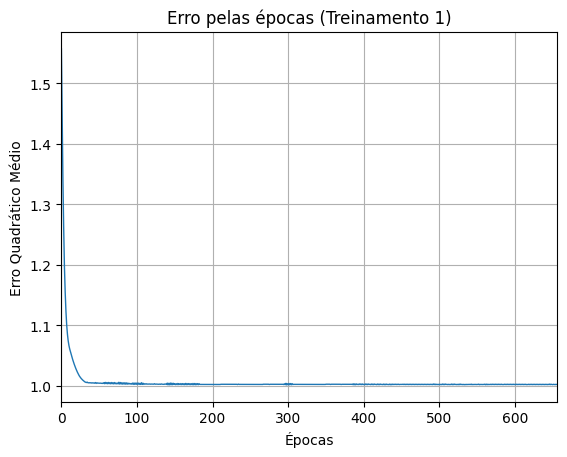

------------------------------
Treinamento numero: 1
------------------------------
Pesos iniciais aleatorios: 
 [[0.93748445]
 [0.33033282]
 [0.51042399]
 [0.5648639 ]
 [0.8910466 ]]
------------------------------
Convergência em 713 épocas
Pesos finais: 
 [[ 0.55389949]
 [ 0.50736974]
 [-0.02799277]
 [-0.37291252]
 [-0.0789534 ]]


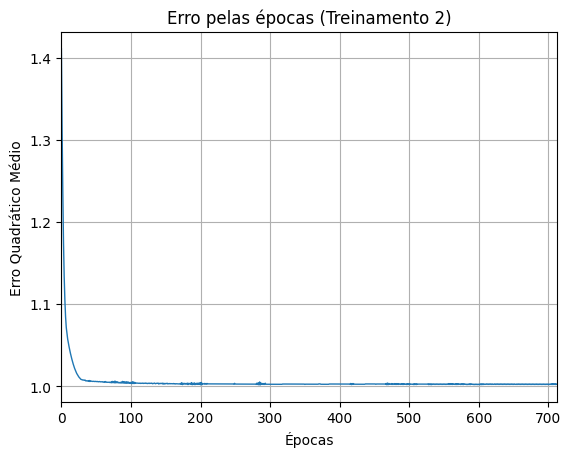

------------------------------
Treinamento numero: 2
------------------------------
Pesos iniciais aleatorios: 
 [[0.37673481]
 [0.78070487]
 [0.85334294]
 [0.47005666]
 [0.24894812]]
------------------------------
Convergência em 840 épocas
Pesos finais: 
 [[ 0.54207833]
 [ 0.51155427]
 [-0.0330187 ]
 [-0.3717651 ]
 [-0.08105188]]
------------------------------
Treinamento numero: 3
------------------------------
Pesos iniciais aleatorios: 
 [[0.83363856]
 [0.5949735 ]
 [0.05689374]
 [0.60143975]
 [0.63519491]]
------------------------------
Convergência em 317 épocas
Pesos finais: 
 [[ 0.54600174]
 [ 0.49224773]
 [ 0.00745595]
 [-0.35271428]
 [-0.07480509]]
------------------------------
Treinamento numero: 4
------------------------------
Pesos iniciais aleatorios: 
 [[0.60707165]
 [0.48089943]
 [0.90889058]
 [0.91251244]
 [0.14343133]]
------------------------------
Convergência em 819 épocas
Pesos finais: 
 [[ 0.46772083]
 [ 0.44595318]
 [-0.03762148]
 [-0.32293995]
 [-0.07156867]

In [134]:
pesos_inicias, pesos_finais, resultado = app(MAX_EPOCA, n, p, wi, wf, X_norm, y, X_teste_norm)

### Resultados

---

In [135]:
pesos_inicias

,w0,w1,w2,w3,w4
0,0.84514,0.439074,0.297192,0.55122,0.967466
1,0.937484,0.330333,0.510424,0.564864,0.891047
2,0.376735,0.780705,0.853343,0.470057,0.248948
3,0.833639,0.594973,0.056894,0.60144,0.635195
4,0.607072,0.480899,0.908891,0.912512,0.143431


In [136]:
pesos_finais

,w0,w1,w2,w3,w4
0,0.522647,0.488313,-0.034465,-0.354632,-0.077534
1,0.553899,0.50737,-0.027993,-0.372913,-0.078953
2,0.542078,0.511554,-0.033019,-0.371765,-0.081052
3,0.546002,0.492248,0.007456,-0.352714,-0.074805
4,0.467721,0.445953,-0.037621,-0.32294,-0.071569
